In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# - 표시 오류 해결
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 굴림으로 설정
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
mpl.rcParams.update({'font.size': 15})

# 소비자 동향 조사

① 계층별 소비자동향지수는 동일 지수, 동일 계층 내 시계열 추이 분석편의*를 위해 제공

* 예시) 현재생활형편CSI 중 100만원 미만 소득계층의 지수가 그동안 어떻게 변해왔는지 분석

② 다만, 각 계층별 표본수 및 시계열 변동성에 차이가 있기 때문에 지수 수준 및 변동폭을 계층간에 단순 비교・평가시 주의할 필요

- 표본 개편 시점(2013.1월, 2018.9월) 전후의 지수를 비교할 때에는 표본개편으로 인한 표본내 계층별 구성비중 및 응답성향 변화로 인한 신・구 표본의 지수 수준에 다소 차이가 있으므로 이용에 유의할 필요

- 소비자동향지수(CSI) = [(매우 좋아짐×1.0＋약간 좋아짐×0.5＋비슷함×0.0－약간 나빠짐×0.5－매우 나빠짐×1.0)/전체 응답 가구수×100]＋100

* "현재"는 6개월 전과 비교한 현재, "전망"은 현재와 비교한 6개월 후에 대한 소비자들의 판단을 조사한 결과

** 다만, 물가수준, 주택가격, 임금수준 전망은 각각 향후 1년 후에 대한 소비자들의 판단을 조사한 결과

- 소비자심리지수(CCSI) = 주요 개별지수(현재생활형편 등 6개)를 표준하여 합성한 지수로, 경제상황에 대한 종합적인 소비자심리지표임

100 이상이면 긍정적 전망, 100 미만이면 부정적 전망이라고 해석할 수 있음

데이터 출처 : https://kosis.kr/statHtml/statHtml.do?orgId=301&tblId=DT_040Y002&checkFlag=N

In [2]:
customer = pd.read_excel("월별소비자동향조사_201901_202010.xlsx")

In [3]:
customer.head(-5)

,지수코드별,분류코드별,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,...,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
0,현재생활형편CSI,전체,90.0,93.0,91.0,93.0,91.0,91.0,91.0,90.0,...,93.0,91.0,83.0,77.0,79.0,84.0,85.0,85.0,81.0,86.0
1,현재생활형편CSI,남자,90.0,93.0,91.0,92.0,91.0,91.0,90.0,89.0,...,93.0,91.0,82.0,76.0,79.0,84.0,85.0,85.0,81.0,86.0
2,현재생활형편CSI,여자,90.0,93.0,93.0,96.0,92.0,95.0,94.0,93.0,...,95.0,94.0,84.0,79.0,80.0,85.0,86.0,86.0,81.0,86.0
3,현재생활형편CSI,40세미만,93.0,99.0,97.0,98.0,95.0,95.0,95.0,95.0,...,97.0,96.0,90.0,87.0,87.0,90.0,90.0,91.0,87.0,92.0
4,현재생활형편CSI,40-50세,93.0,95.0,91.0,95.0,93.0,92.0,93.0,92.0,...,96.0,96.0,85.0,77.0,81.0,86.0,87.0,86.0,83.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,임금수준전망CSI,200-300만원,122.0,120.0,116.0,116.0,114.0,116.0,118.0,116.0,...,118.0,114.0,111.0,103.0,105.0,107.0,111.0,112.0,107.0,109.0
520,임금수준전망CSI,300-400만원,121.0,118.0,110.0,114.0,112.0,114.0,115.0,116.0,...,118.0,115.0,108.0,99.0,100.0,102.0,107.0,109.0,102.0,108.0
521,임금수준전망CSI,400-500만원,121.0,119.0,118.0,116.0,115.0,115.0,117.0,117.0,...,117.0,114.0,106.0,103.0,102.0,104.0,108.0,111.0,104.0,109.0
522,임금수준전망CSI,500만원이상,122.0,121.0,117.0,118.0,118.0,119.0,120.0,119.0,...,121.0,117.0,110.0,101.0,104.0,105.0,111.0,111.0,105.0,110.0


In [4]:
def preprocessing_customer_trend_data(df):
    df = df.loc[df['분류코드별'] == '전체']
    df = df.drop('분류코드별', axis=1)
    df.set_index(keys='지수코드별', drop=True, inplace=True)
    df = df.T
    df.index = pd.to_datetime(df.index, format='%Y-%m')
    
    return df

In [5]:
customer_1901_2010 = preprocessing_customer_trend_data(customer)

In [6]:
customer_1901_2010.head()

지수코드별,현재생활형편CSI,현재경기판단CSI,생활형편전망CSI,향후경기전망CSI,취업기회전망CSI,금리수준전망CSI,가계수입전망CSI,소비지출전망CSI,내구재 지출전망CSI,의류비 지출전망CSI,...,교통비 및 통신비 지출전망CSI,주거비 지출전망CSI,현재가계저축CSI,가계저축전망CSI,현재가계부채CSI,가계부채전망CSI,물가수준전망(1년후)CSI,주택가격전망CSI,임금수준전망CSI,소비자심리지수
2019-01-01,90.0,65.0,91.0,76.0,78.0,125.0,98.0,109.0,95.0,96.0,...,108.0,105.0,91.0,95.0,102.0,99.0,145.0,91.0,122.0,97.5
2019-02-01,93.0,70.0,92.0,80.0,79.0,120.0,98.0,109.0,95.0,96.0,...,110.0,103.0,93.0,94.0,102.0,99.0,145.0,84.0,120.0,99.6
2019-03-01,91.0,70.0,94.0,79.0,79.0,115.0,98.0,110.0,95.0,97.0,...,109.0,103.0,92.0,93.0,102.0,99.0,144.0,83.0,116.0,99.8
2019-04-01,93.0,74.0,95.0,81.0,83.0,110.0,99.0,110.0,95.0,98.0,...,109.0,103.0,95.0,97.0,101.0,98.0,142.0,87.0,117.0,101.7
2019-05-01,91.0,69.0,92.0,75.0,80.0,109.0,97.0,109.0,94.0,97.0,...,112.0,103.0,93.0,95.0,101.0,97.0,145.0,93.0,116.0,97.9


In [7]:
customer_1901_2010.columns

Index(['현재생활형편CSI', '현재경기판단CSI', '생활형편전망CSI', '향후경기전망CSI', '취업기회전망CSI',
       '금리수준전망CSI', '가계수입전망CSI', '소비지출전망CSI', '내구재 지출전망CSI', '의류비 지출전망CSI',
       '외식비 지출전망CSI', '여행비 지출전망CSI', '교육비 지출전망CSI', '의료·보건비 지출전망CSI',
       '교양·오락·문화생활비 지출전망CSI', '교통비 및 통신비 지출전망CSI', '주거비 지출전망CSI', '현재가계저축CSI',
       '가계저축전망CSI', '현재가계부채CSI', '가계부채전망CSI', '물가수준전망(1년후)CSI', '주택가격전망CSI',
       '임금수준전망CSI', '소비자심리지수'],
      dtype='object', name='지수코드별')

### 올해 1~10월의 소비자 전망과 작년 동분기의 소비자 전망을 비교

### 작년과 많이 다른 부분이 있다면 코로나의 영향을 받았을 가능성이 높다고 생각함

In [8]:
month = np.array([str(i) + '월' for i in range(1, 11)])

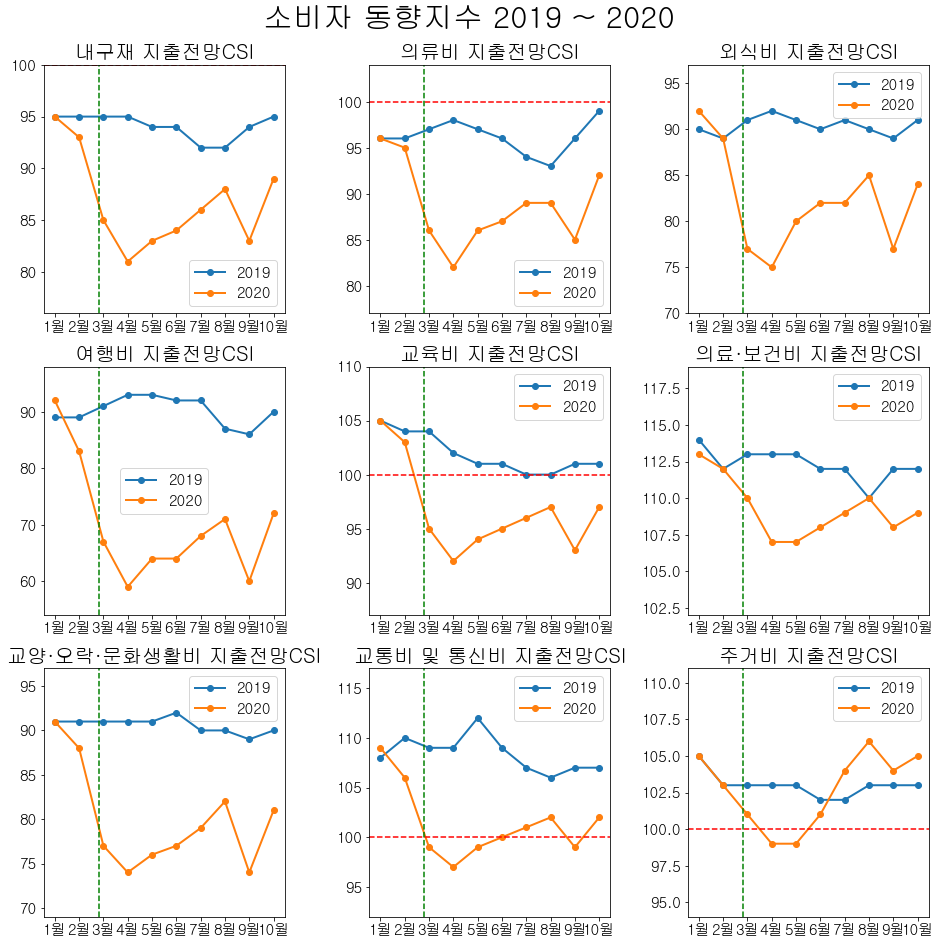

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(13, 13), constrained_layout=True)

axes = axes.ravel()

for i in range(len(axes)):
    axes[i].plot(month,
                 np.array(customer_1901_2010.iloc[:10, 8+i]), marker='o', linewidth=2, label='2019')
    axes[i].plot(month,
                 np.array(customer_1901_2010.iloc[-10:, 8+i]), marker='o', linewidth=2, label='2020')
    
    axes[i].set_ylim((np.min(customer_1901_2010.iloc[:, 8+i]) - 5,
                      np.max(customer_1901_2010.iloc[:, 8+i]) + 5))
    
    axes[i].axhline(y=100, color='r', linestyle='dashed') # 기준선
    axes[i].axvline(x=1.8, color='g', linestyle='dashed') # 코로나 폭발
    
    axes[i].set_title(list(customer_1901_2010.columns)[8+i], fontsize=20)
    axes[i].legend()

fig.suptitle('소비자 동향지수 2019 ~ 2020', fontsize=30)
plt.show()

## 소비자 동향 전망을 통해 유망 산업과 쇠퇴 산업을 찾아보자

코로나를 기점으로 빠르게 감소한 것은 9개의 분야 모두 동일 => 얼마나 감소했는지, 얼마나 빠르게 회복하는지, 작년과 얼마나 많이 차이나는지를 통해 유망과 쇠퇴를 판단해야할 것 같음

코로나 폭발의 기점을 2월 말로 잡았는데 저희가 가진 데이터에서는 그 근거가 없음 => 코로나 데이터로 최소한 포스트 코로나를 어느 시기로 잡을것인지 정의해주는것 정도는 필요하다고 생각

(여기서는 데이콘 게시물을 참고 : https://www.dacon.io/competitions/official/235618/codeshare/1363?page=1&dtype=view&ptype=pub)

국가통계라 너무 대분류로 묶여있어서 사용하기가 애매한가...?

일단 대강 봤을 땐

유망 산업 : 의료보건, 주거(부동산?)

빠르게 회복한 산업 : 교통 및 통신

쇠퇴 산업 : 여행, 교양오락문화생활 (어떻게 보면 당연하긴한데 그거에 대한 근거?로 이런 국가 통계를 이용할 수 있을 듯)

여기서 유망, 쇠퇴 산업 분류하고 그 분야에 대한 세부 데이터 찾아서 산업의 세부항목 중 어디가 가장 뜨고있다 또는 가장 망하고 있다 이런식으로 갈 수 있지 않을까요?

예를들어 여행에선 여행사 관련 데이터, 항공사 관련 데이터, 입출국 데이터 등등이 있을 것 같고

교양오락문화생활에선 영화관, 공연관람 등이 있을듯? 근데 OTT가 문화생활로 들어가는지 통신으로 들어가는지 모르겠네요

주거비는 집값 데이터를 가져와야되나... 근데 그건 코로나때문은 아닌것같은데.